<h1 align="center">Medium Archive  Analysis (Data Analysis Phase)</h1>

<br>
In this notebook I will create an extensive exploratory data analysis with the data that results from our data-cleaning notebook, "Data_Cleaning_Prototype". This notebook is meant to be the "answer everything" notebook, where I answer every question I could possibly think about the dataset. As a result, this notebook is very long.


## Where the data came from.

I pulled this data from Medium's archive pages. Each archive page is associated to a story-tag and is a <b>collection of Medium timeline cards organized by date.</b>
<br>

<h3 align="center"> Image of the "<a href="https://medium.com/tag/data-science/archive">data-science</a>" Archive</h3>

### How the data was scraped
The data was pulled from  95 popular Medium story-tag archives. Each archive was <b>scraped for each day between Aug 1, 2017 and Aug 1, 2018.</b>

These dates were chosen because:
1. Medium's clap metric was introduced in August 2017, and older posts might not be relevant. 
2. The popularity of Medium may have grown, so older posts may not generalize to the preformance of posts today. 
3. The end date was chosen so that newer posts (September) were not included, as they have not had time to mature and accumulate claps.

### The 95 Tags Scraped
['android', 'apple', 'architecture', 'art', 'bitcoin', 'blacklivesmatter', 'blockchain', 'blog', 'blogging', 'books', 'branding', 'business', 'college', 'creativity', 'cryptocurrency', 'culture', 'deep-learning', 'design', 'dogs', 'donald-trump', 'economics', 'education', 'energy', 'entrepreneurship', 'environment', 'ethereum', 'feminism', 'fiction', 'food', 'football', 'gadgets', 'google', 'government', 'happiness', 'health', 'history', 'humor', 'inspiration', 'interior-design', 'investing', 'ios', 'javascript', 'jobs', 'journalism', 'leadership', 'life', 'life-lessons', 'love', 'machine-learning', 'marketing', 'medium', 'mobile', 'motivation', 'movies', 'music', 'nba', 'news', 'nutrition', 'parenting', 'personal-development', 'photography', 'poem', 'poetry', 'politics', 'product-design', 'productivity', 'programming', 'psychology', 'python', 'python', 'racism', 'react', 'relationships', 'science', 'self-improvement', 'social-media', 'software-engineering', 'sports', 'startup', 'tech', 'technology', 'travel', 'trump', 'ux', 'venture-capital', 'visual-design', 'web-design', 'web-development', 'women', 'wordpress', 'work', 'writing']

 


## Structure of the data
- Title -title of article on timeline card
- Subtitle  -subtitle of article on timeline card
- Image (yes/no)-whether the article has a preview image on its timeline card
- Author -writer of the story
- Publication - the name of the publication the article may have been posted in
- Year - Month - Day-date the article was published
- Reading Time- Time to read the article
- Claps-Number of claps the article received
- Story Url-link to story
- Author URL-link to Author's Medium homepage
- Tag (One-Hot-Encoded)

<br>
<h3 align="center"> Example of Data Scraped from a Timeline Card</h3>

 
 

## Overview of Data Cleaning

<b>Before cleaning: 2.11M entries</b>

- Removed comment entries (-118k)
- Removed NaN in Author Column (-7k)
- Combined multi-tagged articles, that appeared on different archive pages. (-596k)

<b>After cleaning: 1.39M entries</b>

<hr>
<h1 align="center">Loading the Clean Data</h1>



In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


medium = pd.read_csv("Medium_Clean.csv")
medium = medium.drop("Unnamed: 0", axis=1)

medium.head(2)

C:\Users\harri\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Reading_Time,Claps,...,Tag_travel,Tag_trump,Tag_ux,Tag_venture-capital,Tag_web-design,Tag_web-development,Tag_women,Tag_wordpress,Tag_work,Tag_writing
0,Online Animation: Mixamo vs Norah AI,Online animations tools provide game designers...,1,Emma Laurent,NaN,2017,8,1,5,12.0,...,0,0,0,0,0,0,0,0,0,0
1,A.I. ?,NaN,0,Sanparith Marukatat,NaN,2017,8,1,2,11.0,...,0,0,0,0,0,0,0,0,0,0


<hr>
<h1 align="center">Summarizing the Dataset</h1>
## 1.39M articles, 351K authors, and 43K publications across 95 tags

In [2]:
print("Number of Articles: ", medium.shape[0])
print("Number of Authors: ", medium.Author.value_counts().shape[0])
print("Number of Publications: ", medium.Publication.value_counts().shape[0])
print("Number of Tags: ", medium.columns[12:].shape[0])

Number of Articles:  1391033
Number of Authors:  351584
Number of Publications:  43045
Number of Tags:  95


## Range of Claps Received by a Single Article (0 - 291K claps)

In [3]:
print("Minimum # CLaps by an Article: ", int(medium.Claps.min()), )
print("Maximum # Claps by an Article: ", int(medium.Claps.max()))

Minimum # CLaps by an Article:  0
Maximum # Claps by an Article:  291000


<hr>
<h1 align="center">Analyzing One Million Medium Articles</h1>
<br>
Since we scaped timeline cards, each entry in our dataset represents an article published in one of the 95 scraped tags. Some information that I want to look at: 
- When were these articles posted?
- How many claps do most articles receive?
    - What is the 99th percentile of claps-received? <b>(Author performance metric.)</b>
- How long are most Medium articles?

## When were these articles posted?
Note that we can't say that the articles in our dataset represent all articles posted in that one year period. There may have been 403 errors while scraping that prevented some articles from being scraped.

Instead, the date data is combined in the below graph, which represents the number of articles we succesfully scraped for each month in our scraping period (8/17-8/18). <b>We scraped around 100k articles each month from August 1st, 2017 to August 1st 2018.</b>

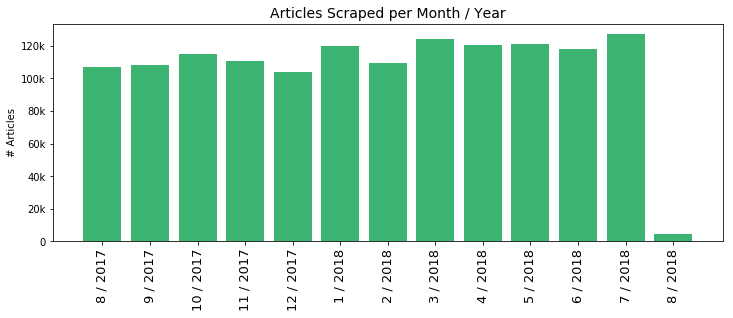

In [4]:
years = [2017,2018]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ym_counts = []
bar_x = []
for year in years:
    for month in months:
        ym_counts.append(medium[(medium.Year==year)&(medium.Month==month)].shape[0])
        bar_x.append(str(month)+" / "+str(year))

ym_counts = ym_counts[7:-4]     
bar_x = bar_x[7:-4]

plt.figure(figsize=(12,4))
plt.bar(bar_x, ym_counts, color = "mediumseagreen")
plt.title("Articles Scraped per Month / Year", fontsize=14)
plt.ylabel("# Articles")
plt.yticks([0,20000,40000,60000,80000,100000,120000],
           ["0", "20k","40k","60k","80k","100k", "120k"])
plt.xticks(rotation=90, fontsize=13)
plt.show()

## How many claps do Medium articles receive?
This section is where our data really shines. Since we collected many unique articles from Medium, we can get a good estimate of how many claps Medium posts tend to get. We can use this estimate to make a reasonable metric for a succesful article. <b>In this analysis, we will say that an exceptional article receives the 99th percentile of claps.</b> As exceptional tends to be a comparative term, this measure seems reasonable to me.

### Most articles receive close to zero claps.
Here we find that most articles receive very few claps. (Less than ten.) <b>64% of our articles receive less than 10 claps.</b> Notice how different the sizes of the bins are. Clearly the distribution of claps is HIGHLY skewed towards zero.

In [5]:
def plot_double(x, height, leftlabel, rightlabel, xlabel=None, ylabel=None, ylocs=None, yticks=None,ylim=None, title = "61% of Articles Receive Less Than Ten Claps"):
    plt.figure(figsize=(7,7))
    plt.bar(x, height, color="mediumseagreen")
    plt.text(0-.1,height[0]+(max(height)*0.05), str(round(100*height[0]/sum(height),1))+"%", fontsize=14)
    plt.text(1-.1,height[1]+(max(height)*0.05), str(round((100*height[1]/sum(height)),1))+"%", fontsize=14)

    plt.title(title, fontsize=14)
    plt.xticks([0,1], [leftlabel, rightlabel], fontsize=13)
    if xlabel:
        plt.xlabel(xlabel,fontsize=13)
    if ylabel:
        plt.ylabel(ylabel,fontsize=13)
    if ylocs:
        plt.yticks(ylocs, yticks)
    if ylim:
        plt.ylim(0,ylim)

    plt.show()


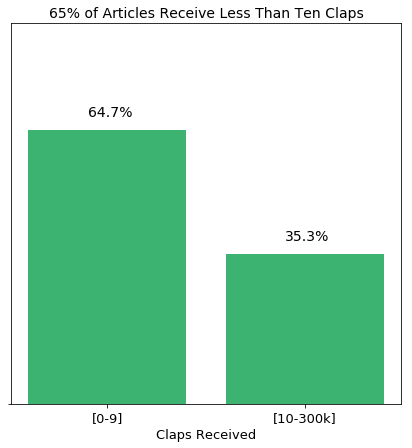

In [6]:
all_articles = medium.shape[0]
under10 = medium[medium.Claps<10].shape[0]
over10 = all_articles-under10

x = [0, 1]
height= [under10, over10]

#ylocs = [0,250000,500000,750000,1000000]
#yticks = ["0","250k", "500k", "750k", "1M", ]

plot_double(x, height,
            "[0-9]",
            "[10-300k]",
            xlabel="Claps Received",
            ylabel=None,
            ylocs=[0],
            yticks=[],
            ylim = 1250000,
            title="65% of Articles Receive Less Than Ten Claps")

As the default number of claps is zero, a majority of posts will only receive a few claps. There are a lot of high performing articles though. THere are the 3 most clapped stories in the dataset.

In [7]:
sorted = medium.sort_values("Claps", ascending=False).url.values[:5]
print("3 Most Clapped Articles")
print()
for x in range(3):
    print(x, "   ",sorted[x])

3 Most Clapped Articles

0     https://medium.com/personal-growth/the-most-important-skill-nobody-taught-you-9b162377ab77
1     https://hackernoon.com/im-harvesting-credit-card-numbers-and-passwords-from-your-site-here-s-how-9a8cb347c5b5
2     https://medium.com/personal-growth/travel-is-no-cure-for-the-mind-e449d3109d71


### Exceptional articles receive 1600 claps.

To get a better understanding of how many artcles are exceptional (99th percentile of claps), we need to plot a smooth estimation of the distribution of claps in our data. We see below the frequency of articles who receive a certain number of claps.

A vast majority of articles receive very few claps, However, there are quite a few articles on Medium who are above the 99th percentile of claps. <b>Note that the range of the claps (0-300k claps) extends far beyond the range of the plot.</b> Also notice that the 99th percentile of claps is included in the visual. Falling at 1600 claps.<b>Therefore, the cutoff for an exceptional article on Medium is 1600 claps.</b>

In a <a href="https://medium.freecodecamp.org/how-i-analyzed-a-million-medium-articles-to-learn-how-many-claps-great-stories-get-d688cf92759f">previous analysis</a>, I analyzed a subset of this data (750k stories) and found the 99th percentile to be two thousand claps. After expanding the dataset to include 60 more tags and 600k more stories. This estimate we get here of 1600 claps is more likely to represent the entire body of Medium stories.

In [8]:
def plot_frequency(kde_data, clip=[0,10000],bw='scott',yvariable = "Article", xvariable = "claps", title = "Exceptional",shorten=False, claplocs=[], kclaps=[]):
    plt.figure(figsize=(12,6))
    sns.kdeplot(kde_data,bw=bw, shade=True, legend=False, clip=clip, color = "mediumseagreen" )
    ninenine = kde_data.quantile(q=0.99)
    plt.axvline(x=ninenine, color="mediumseagreen")
    plt.axvspan(ninenine, clip[1], alpha=0.1, color='lightgreen')
    plt.text(ninenine+(clip[1]-ninenine)*0.075,
                       plt.yticks()[0][-1]/2.5,
                       "Top 1% = "+str(int(ninenine))+ " "+xvariable+".",
                       fontsize=14)

    plt.title(title, fontsize=15)
    plt.ylabel("Frequency of "+yvariable.title(), fontsize=13)
    plt.yticks([])

    plt.xlabel(xvariable.title(), fontsize=13)
    if shorten:
        plt.xticks(claplocs,kclaps, fontsize=12)
    plt.xlim(1,clip[1])

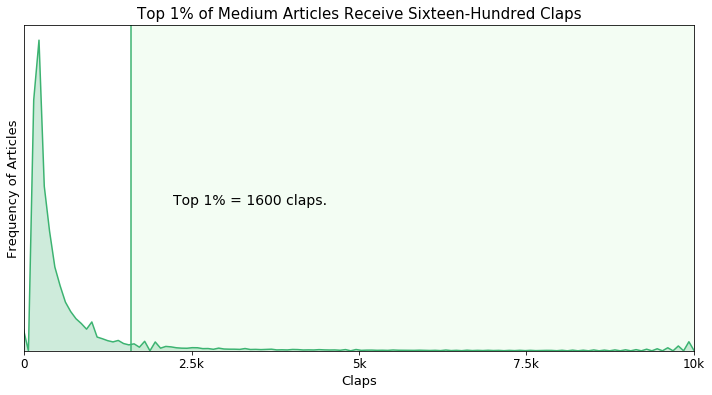

In [9]:
kclaps = ["0","2.5k", "5k", "7.5k", "10k", "12.5k", "15k", "17.5k", "20k"]
claplocs = [0,2500, 5000,7500, 10000,12500,15000,17500,20000]
#KDE plot, shade below curve, clip arg includes values of 0 to 20000

plot_frequency(medium.Claps,
              clip=[0,10000],
               yvariable="Articles",
               xvariable="claps",
              title="Top 1% of Medium Articles Receive Sixteen-Hundred Claps",
               shorten=True,
              claplocs=claplocs,
              kclaps=kclaps)


plt.show()

## How long are Medium articles?

<b>Most Medium articles are 2-3 minutes in length.</b> This suprised me as most of the data science articles I read are around 7-8 minutes in length.

My first thought was maybe a certain tag I scraped has exceptionally short articles, skewing the population reading time. However, <b>after analyzing inividual tags I found that a majority of the tags I scraped contain articles of comparable length to what we find here.</b>

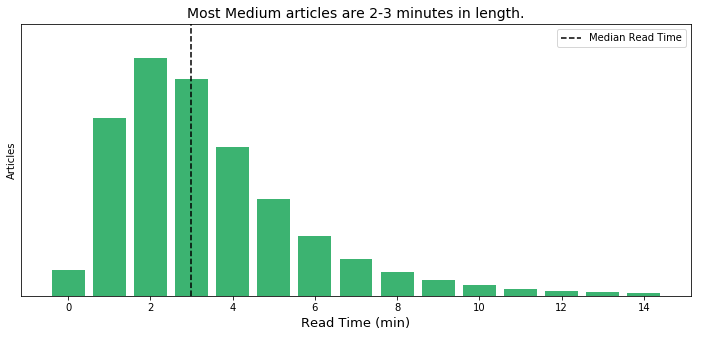

In [10]:
avs=[]
medians=[]
total_cs = []
readts=[]
entries = []
for x in range(15):
    medians.append(medium[medium.Reading_Time==x].Claps.quantile(q=0.5))
    readts.append(x)
    entries.append(medium[medium.Reading_Time==x].shape[0])
    total_cs.append(medium[medium.Reading_Time==x].Claps.sum())

plt.figure(figsize=(12,5))
plt.bar(readts,entries, color="mediumseagreen")
plt.vlines(medium.Reading_Time.median(),0,350000,
           color="black",
           linestyle="dashed",
           label="Median Read Time")
plt.title("Most Medium articles are 2-3 minutes in length.", fontsize=14)
#plt.yticks([0,100000,200000,300000], ["0","100k", "200k", "300k"])
plt.yticks([])
plt.ylim(0,350000)
plt.ylabel("Articles")
plt.xlabel("Read Time (min)", fontsize=13)
plt.legend()

plt.show()

We will now look at the subpopulations of our dataset. 

Since most people only follow a few tags that they are interested in, articles in different tags have different reader-bases. This raises the question, <b>"Do articles in different Tags differ in nature (and success) from stories in other tags?"</b>

In the next section we seek to answer this question futher.

<hr>
<h1 align="center">Analyzing Medium Tags</h1>

In this section I look at each tag-subpopulations of my data set. Questions we want answered:
- How many articles did we scrape from each tag?
- Does any tag receive more applause?
    - Does the cutoff for an exceptional article vary for each tag? <b>(Author performance metric)</b>
- Are any tag's articles longer than average? 

## How many articles did we scrape from each tag?



In [11]:
def sort_helper(names,numbers):
    #change to array
    numbers = np.array(numbers)
    names = np.array(names)    
    #sort tag article-counts for aesthetics    
    sort_idx = list(reversed(np.argsort(numbers)))
    numbers = numbers[sort_idx]
    names = names[sort_idx]
    return names, numbers

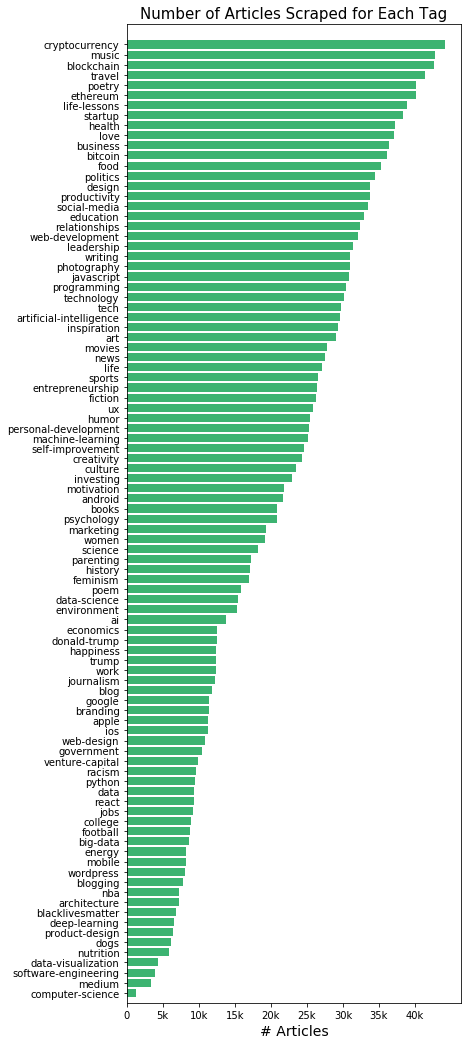

In [12]:
tag_counts=[]
tag_names=[]
for x in medium.columns[12:].values:
    tag_names.append(x[4:])
    tag_counts.append(medium[x].sum())

tag_names, tag_counts = sort_helper(tag_names, tag_counts)
tag_names = np.flip(tag_names,axis=0)
tag_counts = np.flip(tag_counts,axis=0)


plt.figure(figsize=(6,18))
plt.barh(tag_names ,tag_counts, color="mediumseagreen")
plt.title("Number of Articles Scraped for Each Tag", fontsize=15)
plt.xlabel("# Articles", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks([0,5000,10000,15000,20000,25000,30000,35000,40000], ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"])
plt.ylim(-1,96)
plt.show()

## Does any tag receive more applause?





### The 99th percentile of claps-received varies for each tag.

Here we see that <b>there is a significant spread of the top performing articles for each tag.</b> If we were to create a metric out of the 99th percentile, we would have to consider that the tag an author is writing in may have higher standards than other tags. <b>This means that it will be harder to write an exceptional story in some tags, and easier in others.</b>

In [13]:
tags = medium.columns[12:]

#a list of ninety ninth percentiles for all tags.
tags_ninenine=[]
for tag in tags:
    ninenine = medium[medium[tag]>0].Claps.quantile(q=0.99)
    tags_ninenine.append(ninenine)

tags_sort, tags_ninenine = sort_helper(tags,tags_ninenine)
tags_sort = np.flip(tags_sort, axis=0)
tags_ninenine = np.flip(tags_ninenine, axis=0)


temp=[]
for idx in range(len(tags_sort)):
    temp.append(tags_sort[idx][4:])
tags_sort = temp

### Number of claps exceptional articles receive for each tag. 

If you were to measure your article's performance, <b>you might compare it to whichever 99th percentile is highest. That may be the population metric of 1600 claps, or the 99th percentile of the tag you write in (~2900 claps data-science for me.)</b>


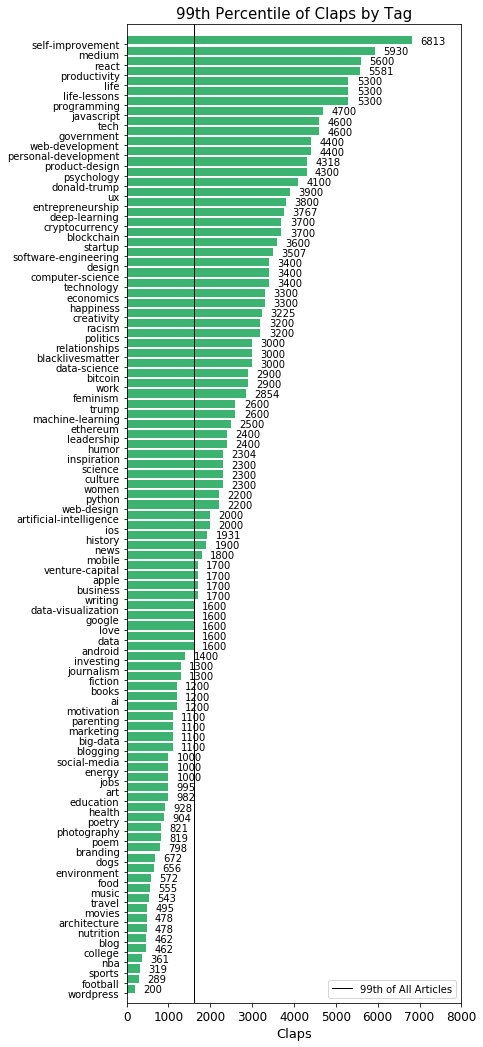

In [14]:
plt.figure(figsize=(6,18))
plt.barh(tags_sort,tags_ninenine, color="mediumseagreen", align="edge")
plt.axvline(medium.Claps.quantile(0.99), color="black",lw=1,label="99th of All Articles")

for idx in range(len(tags_ninenine)):
    plt.text(tags_ninenine[idx]+200, idx+.05, str(int(tags_ninenine[idx])))

plt.title("99th Percentile of Claps by Tag", fontsize=15)
plt.legend()
plt.xlabel("Claps", fontsize=13)
plt.xticks(fontsize=12)
plt.xlim(0,8000)
plt.ylim(-1,96)
plt.yticks(fontsize=10)
plt.show()

## Do some tags tend to have longer stories than others?

Below we see KDE plots estimating the distribution of reading times for each Medium tag. <b>Most tags have articles that are similar in length, except for poetry which is exceptionally short.</b> Poetry is the pink line, which is left shifted since (as we will see) poetry articles tend to be shorter.

In [15]:
rt_medians=[]
readts=[]
rt_counts = []
rts_by_tag={}

for tag in tags:
    tag_df = medium[medium[tag]>0]
    rt_medians.append(tag_df.Reading_Time.median())
    for mins in range(32):
        readts.append(mins)
        rt_counts.append(tag_df[tag_df.Reading_Time==mins].shape[0])
    temp = [readts,rt_counts]
    rts_by_tag[tag]=temp
    readts=[]
    rt_counts = []
    temp=[]    

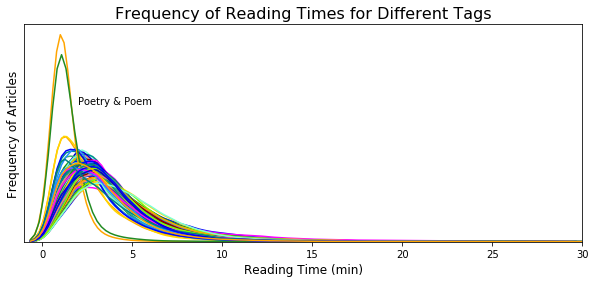

In [16]:
colors = ["mediumseagreen","darkcyan", "lightcoral", "aquamarine", "chartreuse", "dodgerblue","magenta", "mediumblue","teal",
          "blue","orange", "forestgreen","darkred","gold","steelblue","beige", "firebrick","chocolate",
          "green","red","darkslateblue","thistle","c", "hotpink"]
colorcount=0
plt.figure(figsize=(10,4))
ax=plt.subplot()
colorcount=0
for tag in tags:
    if colorcount==14:
        colorcount=0
    Color = colors[colorcount]
    sns.kdeplot(medium[medium[tag]>0].Reading_Time,
                color=Color,
                bw=.55,
                label=tag[4:],
                clip=[0,30],
                ax=ax,
                legend=False)
    colorcount+=1
    
plt.title("Frequency of Reading Times for Different Tags", fontsize=16)
plt.xlabel("Reading Time (min)", fontsize=12)
plt.text(2, 0.4, "Poetry & Poem")
plt.yticks([])
plt.ylabel("Frequency of Articles", fontsize=12)
plt.xlim(-1,30)
plt.show()

### The longest and shortest tags.

This plot displays the median read time of each tag. Note that the median of each tag describes the number of minutes that most articles in that tag fall under. <b>Here we see that most tags are consistent to having a median read time of 3 minutes.</b> Poetry however, has an exceptionally short read time compared to the other tags.

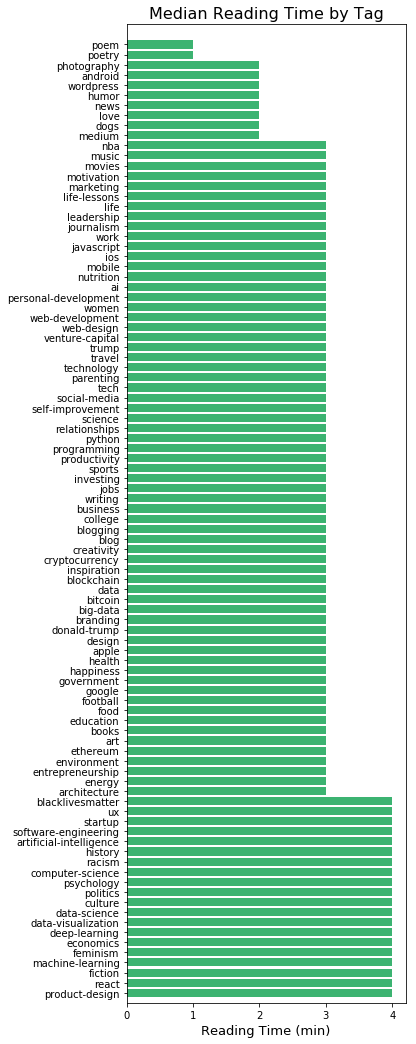

In [17]:
#sort
tags_sort, rt_medians_sort = sort_helper(tags, rt_medians)    

for x in range(len(tags_sort)):
    tags_sort[x]=tags_sort[x][4:]
    
plt.figure(figsize=(5,18))
plt.barh(tags_sort, rt_medians_sort, color="mediumseagreen")
plt.title("Median Reading Time by Tag", fontsize=16)
plt.xlabel("Reading Time (min)", fontsize=13)
plt.xticks([0,1,2,3,4],)
plt.yticks(fontsize=10)
plt.ylim(-1,96)
plt.show()

The quality of articles in each tag depends on the authors that create content for their reader base. In the next section we look at how we can compare authors to each other, and better understand the creators of Medium.

<hr>
<h1 align="center">Analyzing Medium Authors</h1>

In this section we will seek to look at Medium's community of authors. Specifically:
- What percent of authors have been published in a publication?
- How many articles do most authors write?
    - Who are the most prolific writers?

## What percent of authors have been published in a publication?
Becoming a writer in a publication is a significant step towards becoming a high-performing Medium writer. By writing for a publication, the readership of your articles drastically increases, but just how many authors take this step? <b>In this dataset, we find that a quarter of all authors have written for a Medium publication.</b>

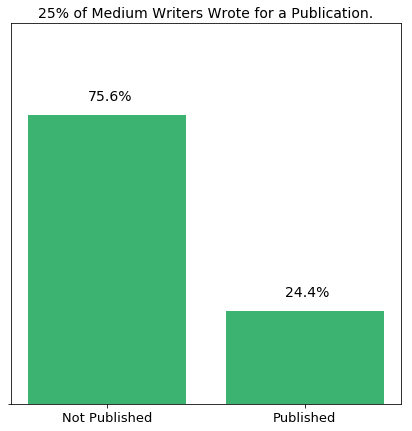

In [18]:
All_Authors = medium.Author.value_counts().shape[0] 
Published_Authors = medium[pd.notnull(medium.Publication)].Author.value_counts().shape[0] 
Not_Published_Authors = All_Authors-Published_Authors

x = [0, 1]
height= [Not_Published_Authors, Published_Authors]

ylocs = [0]
yticks = []

plot_double(x, height,
            "Not Published",
            "Published",
            xlabel=None,
            ylabel="",
            ylocs=ylocs,
            yticks=yticks,
            ylim=350000,
            title="25% of Medium Writers Wrote for a Publication.")

## How many articles did most authors write?


 I shocking insight from our data, <b> 51% of Medium authors only wrote one story.</b> These writers have only written one article in the period of 8/2017-8/2018. 

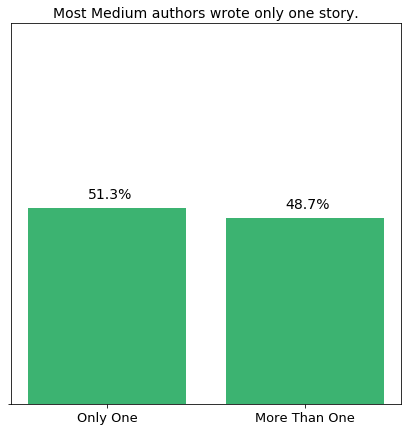

In [19]:
author_counts = medium.Author.value_counts()
single_posters = author_counts[author_counts<2].shape[0]
all_authors = author_counts.shape[0]
more_posters = all_authors-single_posters

x = [0, 1]
height= [single_posters, more_posters]

ylocs = [0]
yticks = []

plot_double(x, height,
            "Only One",
            "More Than One",
            xlabel=None,
            ylabel=None,
            ylocs=ylocs,
            yticks=yticks,
            ylim=350000,
            title="Most Medium authors wrote only one story.")

So most authors wrote only one article in this one year period. But how many articles do the most frequently published authors write? <b>Prolific writers (top 1% most published) have written more than 40 articles in the 8/2017-8/2018 period.</b>

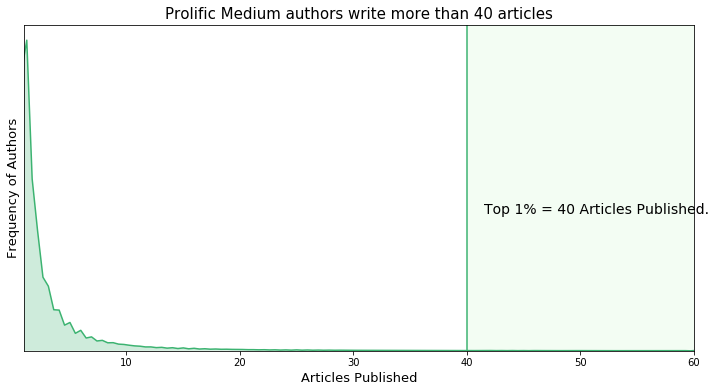

In [20]:
plot_frequency(medium.Author.value_counts(),
              clip=[0,60],
               bw=0.4,
              yvariable = "Authors",
               xvariable="Articles Published",
              title="Prolific Medium authors write more than 40 articles",
              shorten=False)
plt.show()

### Top 10 Most Prolific Authors
Here I have to start at the 2nd top ranked author as the first ranked author is a combination of all chinese writing authors (authors who type with chinese symbols.). My scraper only saved unicode symbols, so chinese characters were saved as a space. Instead of being counted seperately, Chinese authors are counted together.

In [21]:
def print_list(data, metric):
    dash = '-' * 100
    for i in range(len(data)):
        if i == 0:
          print(dash)
          print('{:<8s}{:<7s}{:^25s}{:^12s}'.format("Rank",metric,"Author","Url"))
          print(dash)
        auth = data.index[i]
        link = medium[medium.Author==auth].Author_url.values[0]
        link = link.split("?")[0]
        print('{:<8d}{:<10d}{:<25s}{:<20s}'.format(i+1,int(data[i]),auth, link))

In [22]:
print("Top 10 Most Prolific Medium Authors")
print()
print_list( medium.Author.value_counts()[1:11], "# Articles")

Top 10 Most Prolific Medium Authors

----------------------------------------------------------------------------------------------------
Rank    # Articles         Author              Url     
----------------------------------------------------------------------------------------------------
1       1934      WooCommerce              https://medium.com/@WooCommerce
2       1891      Scott Myers              https://medium.com/@myerss5
3       1237      Samantha Bambino         https://bensalemtimes.com/@sbambino
4       1111      Yitzi Weiner             https://medium.com/@rabbiweiner
5       1088      Programming Buddy Club   https://medium.com/@programmingbuddyclub
6       1048      Klaus-Dieter Thill       https://medium.com/@ifabs
7       904       Rosemary Nonny Knight    https://medium.com/@rosemarynknight
8       902       TimGolden                https://medium.com/@treasurelife911
9       882       Zane Clark               https://mtlaurelsun.com/@zclark88
10      832      

<hr>
<h1 align="center">Measuring Author Performance</h1>

In this section we will flesh out a metric to measure author performance. The metrics we will  look at?
- Average claps per Article.
- Creation of an 99th percentile article.
    - How many exceptional articles do top authors write?
    

## Total Claps Received

In [23]:
temp = medium.copy()
#creates a row that we will sum to get total articles by each author
temp["count"] = 1
auths_arts = temp.groupby("Author").sum()
total_claps = auths_arts["Claps"]
total_claps = np.flip(total_claps.sort_values(ascending=False)[:10], axis=0)

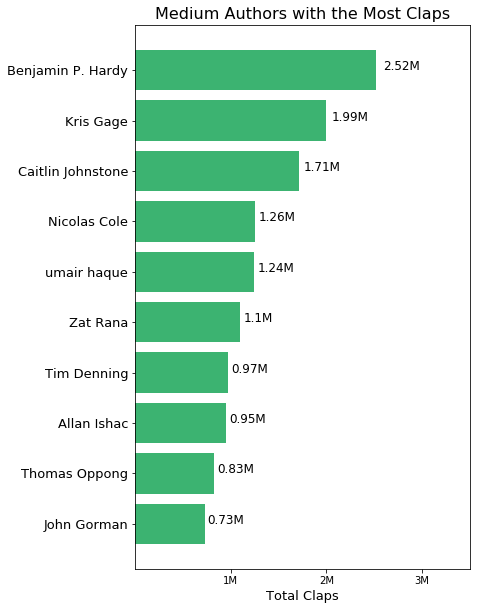

In [24]:
plt.figure(figsize=(6,10))
plt.barh(total_claps.index, total_claps, color="mediumseagreen")

for idx in range(10):
    value = total_claps[idx]
    plt.text(value *1.03, idx, str(round(value/1000000,2))+ "M", fontsize=12)

plt.title("Medium Authors with the Most Claps", fontsize=16)
plt.xlim(0,3500000)
plt.xlabel("Total Claps",fontsize=13)
plt.xticks([1000000,2000000,3000000],["1M","2M", "3M",])
plt.yticks(fontsize=13)
plt.show()

In [25]:
total_claps = np.flip(total_claps, axis=0)
print("Top 10 Most Clapped Authors")
print()
print_list(total_claps, "# Claps")

Top 10 Most Clapped Authors

----------------------------------------------------------------------------------------------------
Rank    # Claps         Author              Url     
----------------------------------------------------------------------------------------------------
1       2517930   Benjamin P. Hardy        https://medium.com/@benjaminhardy
2       1993736   Kris Gage                https://medium.com/@krisgage
3       1710709   Caitlin Johnstone        https://medium.com/@caityjohnstone
4       1258030   Nicolas Cole             https://hackernoon.com/@nicolascole77
5       1241040   umair haque              https://medium.com/@umairh
6       1101190   Zat Rana                 https://medium.com/@ztrana
7       971784    Tim Denning              https://medium.com/@timdenning
8       951788    Allan Ishac              https://medium.com/@allanishac
9       830102    Thomas Oppong            https://medium.com/@alltopstartups
10      730542    John Gorman             

## Average claps per article.

Is average claps per article a good metric to measure authors by? I say yes, as <b>it favors authors who consistently write high-performing articles. The downside? It inflates authors who are "one-hit-wonders".</b> These authors write one post that skyrockets in claps, then never write again.


That being said, what is the top 1% claps/article? <b>The top 1% of Medium authors average 1100 claps per article.</b>

In [26]:
auths_arts["CA_Ratio"] = auths_arts['Claps']/auths_arts["count"]
CA = auths_arts.sort_values("CA_Ratio", ascending=False)[["CA_Ratio", "count"]]

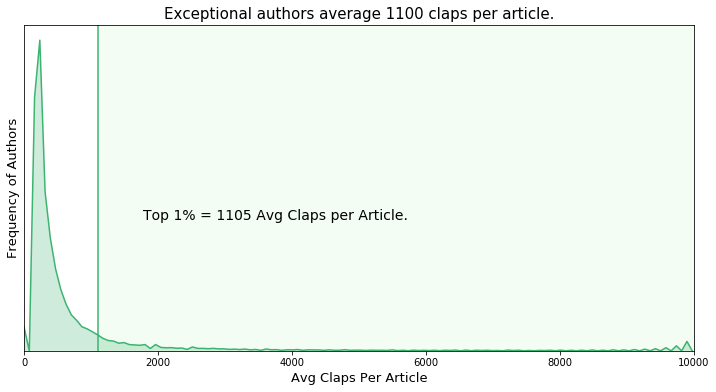

In [27]:
plot_frequency(CA.CA_Ratio,
              clip=[0,10000],
               bw=0.4,
              yvariable = "Authors",
               xvariable="Avg Claps per Article",
              title="Exceptional authors average 1100 claps per article.",
              shorten=False)

plt.show()

### Top 10 Most Clapped Authors (One-Hit-Wonders)
Notice that a majority of the top average clapped authors are <b>authors who have written 1 or 2 posts that have done EXTREMELY well.</b>

In [28]:
def print_multi_list(data, metric1, metric2):
    dash = '-' * 100
    for i in range(len(data)):
        if i == 0:
          print(dash)
          print('{:<8s}{:<12s}{:<7s}{:^25s}{:^12s}'.format("Rank",metric1,metric2,"Author","Url"))
          print(dash)
        auth = data.index[i]
        link = medium[medium.Author==auth].Author_url.values[0]
        link = link.split("?")[0]
        print('{:<8d}{:<12d}{:<10d}{:<25s}{:<20s}'.format(i+1,int(data.iloc[i][0]),int(data.iloc[i][1]),auth, link))

In [29]:
print("Top 10 Authors with Highest Claps per Article")
print()
print_multi_list(CA[:10],"Claps/Art", "# Articles")

Top 10 Authors with Highest Claps per Article

----------------------------------------------------------------------------------------------------
Rank    Claps/Art   # Articles         Author              Url     
----------------------------------------------------------------------------------------------------
1       172000      1         Jackson Cunningham       https://medium.com/@jacksoncunningham
2       170000      1         Adam Wathan Steve Schogerhttps://medium.com/@refactoringui
3       86200       2         James Bridle             https://medium.com/@jamesbridle
4       69000       1         Daniel van Flymen        https://hackernoon.com/@vanflymen
5       61000       1         Mayukh Nair              https://medium.com/@nairmayukh
6       59000       1         Alex Birsan              https://medium.freecodecamp.org/@alex.birsan
7       55700       2         Scott Riddle             https://medium.com/@sgriddle
8       49033       3         Lydia Hallie             

### Top 10 Most Clapped Authors (with total articles > 40)
40 articles written is the cutoff for the top 1% of prolific writers.

In [30]:
veterans = CA[CA["count"]>40][:10]
print("Top 10 Veteran Authors with Highest Claps per Article")
print()
print_multi_list(veterans,"Claps/Art", "# Articles")

Top 10 Veteran Authors with Highest Claps per Article

----------------------------------------------------------------------------------------------------
Rank    Claps/Art   # Articles         Author              Url     
----------------------------------------------------------------------------------------------------
1       21520       117       Benjamin P. Hardy        https://medium.com/@benjaminhardy
2       13764       80        Zat Rana                 https://medium.com/@ztrana
3       10156       66        Aytekin Tank             https://medium.com/@aytekintank
4       7548        82        Anthony Moore            https://medium.com/@anthony_moore
5       7305        100       John Gorman              https://medium.com/@thisisgorman
6       7194        65        Ryan Holiday             https://medium.com/@RyanHoliday
7       6975        119       Thomas Oppong            https://medium.com/@alltopstartups
8       5969        334       Kris Gage                https://

## Has an author written an exceptional article? (A different metric)

Average claps per article measures consistency of author performance, but it definitely has its flaws. In the previous sections we looked at the 99th percentile of claps-received for all articles and determined that exceptional Medium articles received two thousand claps.

We also found that writing in different fields (tags) drastically changes the cutoff for an exceptional article. <b>Could writing an exceptional article be a good way to rank author performance?</b> We see here that <b> only 1.5% of all Medium writers have written an exceptional story. (1600 claps)</b>

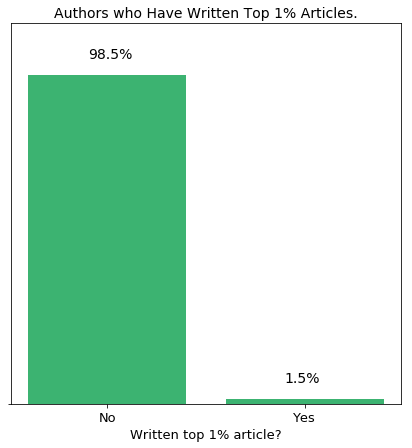

In [31]:
All_Authors = medium.Author.value_counts().shape[0] 
_99percentile = medium.Claps.quantile(q=0.99)

Authors_who_have = medium[medium.Claps>=_99percentile].Author.value_counts().shape[0]
Authors_who_have_not = All_Authors-Authors_who_have

x = [0, 1]
height= [Authors_who_have_not, Authors_who_have]

ylocs = [0]
yticks = []

plot_double(x, height,
            "No",
            "Yes",
            xlabel="Written top 1% article?",
            ylabel=None,
            ylocs=ylocs,
            yticks=yticks,
            ylim=400000,
            title="Authors who Have Written Top 1% Articles.")

This metric has its flaws as well. <b>Here we are solely baseing an author's performance by the highest popularity article they have ever achieved.</b> There is no way to tell if authors that have written an exceptional article have continued to do so consistently. Just how many exceptional articles are authors able to publish?

### How many exceptional articles are authors able to publish?

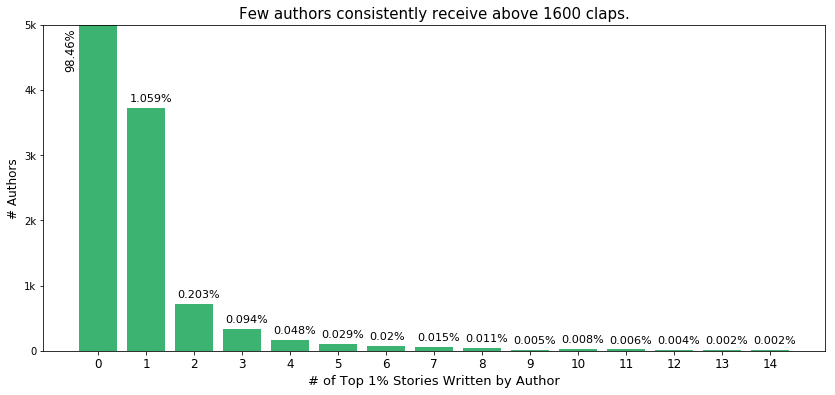

In [32]:
All_Authors = medium.Author.value_counts().shape[0] 
_99percentile = medium.Claps.quantile(q=0.99)

authors = medium[medium.Claps>=_99percentile].Author.value_counts()
height = [Authors_who_have_not]
x=[0]
for i in range(1,15):
    height.append(authors[authors==i].shape[0])
    x.append(i)
    
plt.figure(figsize=(14,6))
plt.bar(x, height, color = "mediumseagreen")

percent=0
for t, i in zip(height[1:], x[1:]):
    percent=t/All_Authors
    plt.text(i-.35, t+100, str(round(percent*100,3))+"%",fontsize=11.2)
plt.text(-0.7,4800, str(round(height[0]*100/All_Authors,2))+"%", rotation=90,fontsize=11.5)

plt.title("Few authors consistently receive above 1600 claps.", fontsize=15)
plt.ylim(0,5000)
plt.ylabel("# Authors",fontsize=12)
plt.yticks([0,1000,2000,3000,4000,5000], ["0","1k","2k", "3k", "4k", "5k"])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],fontsize=12)
plt.xlabel("# of Top 1% Stories Written by Author", fontsize=13)
plt.show()

Despite it's flaws this shows that <b>achieving the 99th percentile of article-claps is no small feet.</b> Authors who do manage to write an article receiveing 1600 claps should be proud, and make it their goal to consistently write exceptional articles.

### Some tags have fewer authors with exceptional articles.

It is interesting to note that <b>some of Medium's most popular tags (leadership, personal-development, life) have the fewest authors who have written an article in the 99th percentile of claps-received.</b> This makes sense as the cutoff for exceptional articles is significantly higher for these tags. 

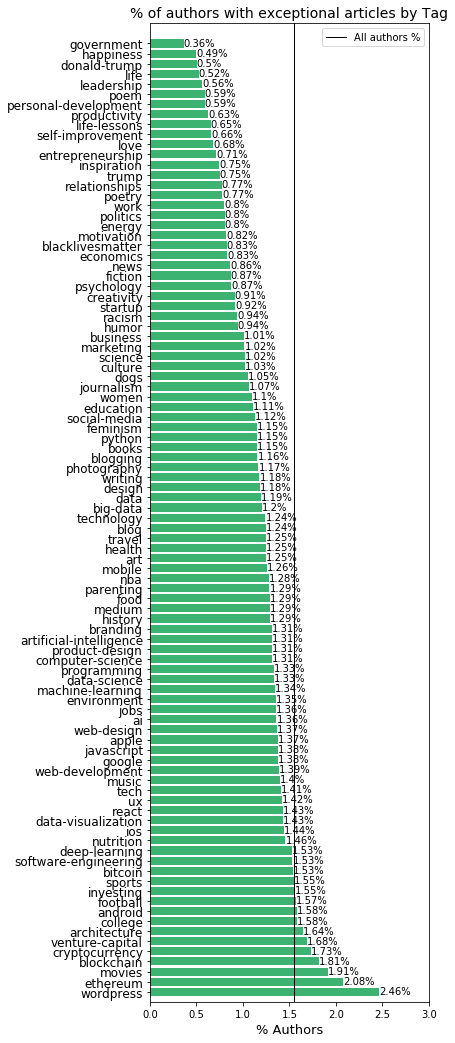

In [33]:
Authors_who_have = medium[medium.Claps>=_99percentile].Author.value_counts().shape[0]

all_authors = 0
pop_percent = (Authors_who_have)*100/All_Authors
tag_authors_who_have = []

for tag in tags:
    tag_df = medium[medium[tag]>0]
    all_tag_authors = (tag_df.Author.value_counts().shape[0])
    top_tag_authors = (tag_df[tag_df.Claps>tag_df.Claps.quantile(0.99)].Author.value_counts().shape[0])
    tag_authors_who_have.append(top_tag_authors*100 / all_tag_authors) 

tags_sort, tags_ninenine = sort_helper(tags, tag_authors_who_have)

temp=[]
for idx in range(len(tags_sort)):
    temp.append(tags_sort[idx][4:])
tags_sort = temp
    
plt.figure(figsize=(5,18))
plt.barh(tags_sort,tags_ninenine, color="mediumseagreen")
plt.axvline(pop_percent, color="black",lw=1,label="All authors %")

for idx in range(len(tags_ninenine)):
    plt.text(tags_ninenine[idx], idx-.25, str(round(tags_ninenine[idx],2))+"%")
    
plt.title("% of authors with exceptional articles by Tag", fontsize=14)
plt.legend()
plt.yticks(fontsize=12)
plt.xlabel("% Authors", fontsize=13)
plt.xlim(0,3)
plt.ylim(-1,96)
plt.show()

<hr>
<h1 align="center">Analyzing Medium Publications</h1>

Publications are the best way for authors to drastically increase their reader-base. With this in mind, we will look at which publications are the most performant.

- Which publications have the most authors?
- Which publications have published the most articles?
- Which publications receives the most claps?
    - What is the 99th percentile for major publications?
    - Which publication averages the most claps per article?

<br>

## Which publications have the most authors?

In [34]:
publications = medium.Publication.value_counts()[:100].index
authors_in_pubs = []
for pub in publications:
    pub_df = medium[medium.Publication==pub]
    authors_in_pubs.append(pub_df.Author.value_counts().shape[0])

pubs_sort, authors_sort = sort_helper(publications, authors_in_pubs)

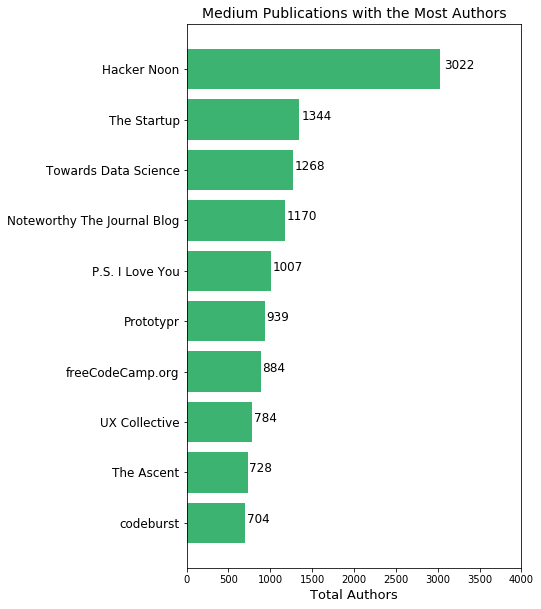

In [35]:
plt.figure(figsize=(6,10))
plt.barh(np.flip(pubs_sort[:10],axis=0), np.flip(authors_sort[:10],axis=0), color="mediumseagreen")

for idx in range(len(pubs_sort[:10])):
    value = np.flip(authors_sort[:10], axis=0)[idx]
    plt.text(value *1.02, idx, str(int(value)), fontsize=12)

plt.title("Medium Publications with the Most Authors",fontsize=14)
plt.xlabel("Total Authors",fontsize=13)
plt.xlim(0,4000)
plt.yticks(fontsize=12)

plt.show()

## Which publications have published the most articles?

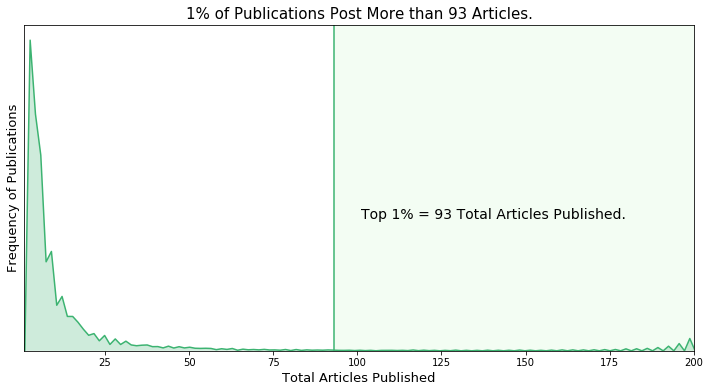

In [36]:
plot_frequency(medium.Publication.value_counts(),
              clip=[0,200],
              yvariable = "Publications",
               xvariable="Total Articles Published",
              title="1% of Publications Post More than 93 Articles.",
              shorten=False)

plt.show()

### Top 10 Publications with the most articles.

In [37]:
print("TOP 10 Most Publishing Publications")
print()
print("Publication             Articles")
print()
print(medium.Publication.value_counts()[:10])

TOP 10 Most Publishing Publications

Publication             Articles

Hacker Noon                9059
P.S. I Love You            5128
The Startup                5001
The Mission                3742
Thrive Global              3321
Towards Data Science       3246
                           2955
The Writing Cooperative    2875
The Ascent                 2859
Poets Unlimited            2487
Name: Publication, dtype: int64


## Which publications receive the most claps?

Below are the top 10 medium publications with the most <b>total  claps received.</b>

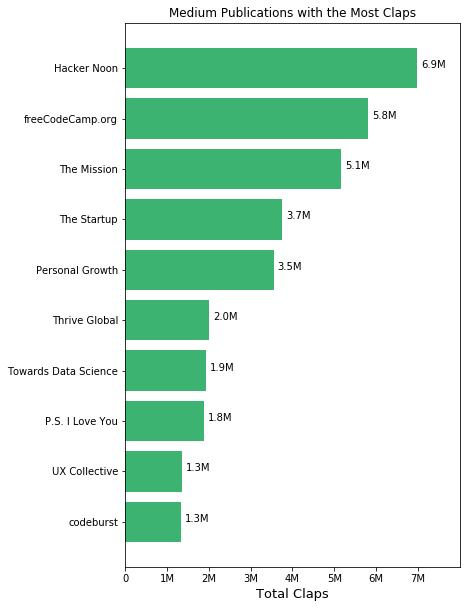

In [38]:
pubs  = medium.groupby("Publication").sum()
pubs = pubs.sort_values("Claps", ascending=True)
plt.figure(figsize=(6,10))
plt.barh(pubs.index[-10:], pubs.Claps[-10:], color="mediumseagreen")

for idx in [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]:
    plt.text(pubs.Claps[idx]+90000, 10+idx, str(pubs.Claps[idx])[0]+"."+str(pubs.Claps[idx])[1]+"M")


plt.title("Medium Publications with the Most Claps")
plt.xticks([0,1000000,2000000,3000000,4000000,5000000, 6000000,7000000], ["0","1M", "2M", "3M", "4M", "5M","6M","7M"])
plt.xlabel("Total Claps",fontsize=13)
plt.xlim(0,8000000)
plt.show()


## What is the top 1% of articles in major publications? 

In [39]:
pubs = pubs_sort[:10]

#a list of ninety ninth percentiles for all tags.
pubs_ninenine=[]
for pub in pubs:
    ninenine = medium[medium.Publication==pub].Claps.quantile(q=0.99)
    pubs_ninenine.append(ninenine)

pubs_sort, pubs_ninenine = sort_helper(pubs,pubs_ninenine)

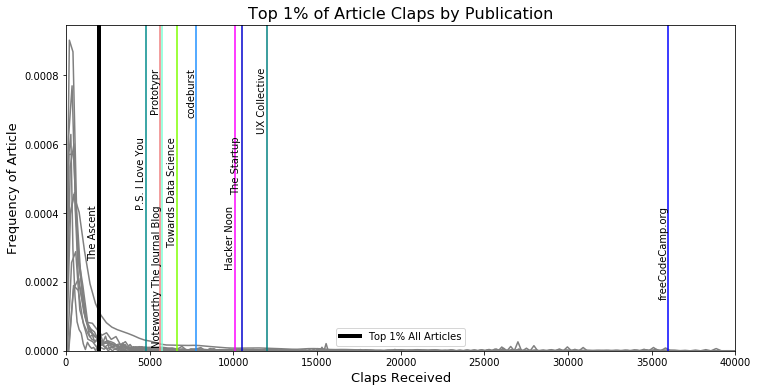

In [40]:
plt.figure(figsize=(12,6))
ax=plt.subplot()

#plotting the Clap Densities
for pub in pubs:
    sns.kdeplot(medium[medium.Publication==pub].Claps,
                color="grey",
                clip=[0,40000],
                label="",
                ax=ax,
                legend=False)
    
#plot the 99th percentiles
colorcount=0
vertical=0.0004
for idx in range(len(pubs_sort)):       
    if colorcount==14:
        colorcount=0
    if vertical>0.0008:
        vertical = 0.0004
        
    Color = colors[colorcount]  
    pub = pubs_sort[9-idx]
    plt.axvline(x=pubs_ninenine[9-idx], color=Color)
    colorcount+=1

    plt.text(pubs_ninenine[9-idx]-600,vertical, pub, rotation=90)
    vertical+=0.0002

plt.axvline(x=2000, color="black",lw=4, label="Top 1% All Articles")

plt.title("Top 1% of Article Claps by Publication", fontsize=16)
plt.xlabel("Claps Received", fontsize=13)
#plt.yticks([])
plt.ylabel("Frequency of Article", fontsize=13)
plt.xlim(0,40000)
plt.legend()
plt.show()

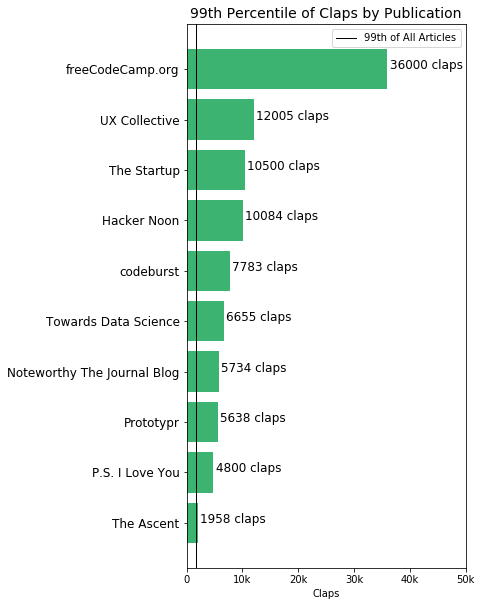

In [41]:
pubs_ninenine = np.flip(pubs_ninenine, axis=0)
pubs_sort = np.flip(pubs_sort, axis=0)


plt.figure(figsize=(5,10))
plt.barh(pubs_sort,pubs_ninenine, color="mediumseagreen")
plt.axvline(medium.Claps.quantile(0.99), color="black",lw=1,label="99th of All Articles")

for idx in range(len(pubs_ninenine)):
    plt.text(pubs_ninenine[idx]+400, idx, str(int(pubs_ninenine[idx]))+" claps", fontsize=12)

plt.title("99th Percentile of Claps by Publication", fontsize=14)
plt.legend()
plt.yticks(fontsize=12)
plt.xticks([0,10000,20000,30000,40000,50000],["0", "10k", "20k", "30k", "40k", "50k"])
plt.xlim(0,50000)
plt.xlabel("Claps")
plt.show()

## Which publications averaged the most claps?

In [42]:
temp = medium.copy()
temp["article_count"] = 1

temp = temp.dropna(subset=["Publication"])
pubs_arts = temp.groupby("Publication").sum()
pubs_arts["CA_Ratio"] = pubs_arts['Claps']/pubs_arts["article_count"]

pubs_arts = pubs_arts[pubs_arts["article_count"]>25]
pub_CA = pubs_arts.sort_values("CA_Ratio", ascending=False)[["CA_Ratio", "article_count"]]

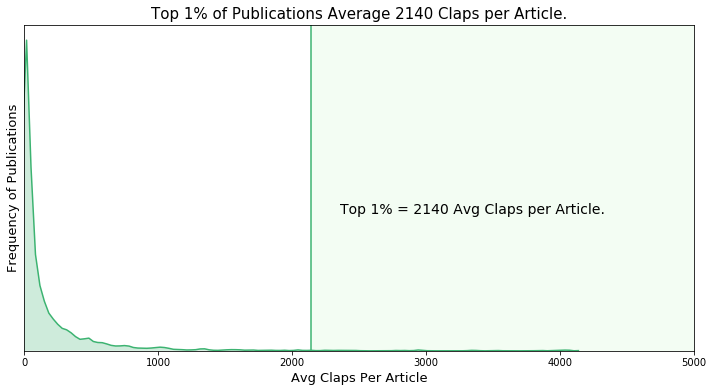

In [43]:
plot_frequency(pub_CA.CA_Ratio,
              clip=[0,5000],
              yvariable = "Publications",
               xvariable="Avg Claps per Article",
              title="Top 1% of Publications Average 2140 Claps per Article.",
              shorten=False)

plt.show()

### Top 10 Most Average Clapped Publications (No Restrictions)


In [44]:
pub_CA[:10]

,CA_Ratio,article_count
Publication,,
SwipeCrypto,6680.000000,27
The Blog Of Darius Foroux,6085.690909,55
Personal Growth,5583.557300,637
IOTA,5214.883721,43
Google Design,5020.185185,27
The Cooper Review,4057.653846,26
The Polymath Project,4049.841584,101
Words for Life,4033.534884,43
World Wi-Fi Blog,3967.024390,41


### Top 10 Most Average Clapped Publications (Total Articles>93)
As we said before the average claps per article tends to inflate publications/authors who have posted fewer articles that have done exceptionally well. <b>Here we look at the publications who have posted more articles than any other publications. (The 99th percentile of articles published.)</b>


In [45]:
pub_CA[pub_CA["article_count"]>93][:10]

,CA_Ratio,article_count
Publication,,
Personal Growth,5583.557300,637
The Polymath Project,4049.841584,101
Eudaimonia and Co,3527.779221,308
freeCodeCamp.org,3335.020080,1743
The Coinbase Blog,2409.968750,96
Signal v. Noise,2362.993151,146
ThinkGrowth.org,2147.743902,164
Better Humans,2124.163636,220
Starts With A Bang!,1864.409302,215


<hr>
<h1 align="center">Mediums Most-Clapped Articles</h1>

## Top 10 Most Clapped Articles

In [46]:
rank=1
top_10 = medium.sort_values("Claps", ascending=False)[:10]["Title"]
top_10_urls = medium.sort_values("Claps", ascending=False)[:10]["url"]
top_10_claps = medium.sort_values("Claps", ascending=False)[:10]["Claps"]
top_10_auth = medium.sort_values("Claps", ascending=False)[:10]["Author"]


for title, url, clap, auth in zip(top_10, top_10_urls,top_10_claps, top_10_auth):
    url = url.split("?")[0]
    print(str(rank)+".  ", str(int(clap))+" claps","  ",title, "   by "+str(auth), "  \n", url)
    print()
    rank+=1

1.   291000 claps    The Most Important Skill Nobody Taught You    by Zat Rana   
 https://medium.com/personal-growth/the-most-important-skill-nobody-taught-you-9b162377ab77

2.   215000 claps    Im harvesting credit card numbers and passwords from your site. Heres how.    by David Gilbertson   
 https://hackernoon.com/im-harvesting-credit-card-numbers-and-passwords-from-your-site-here-s-how-9a8cb347c5b5

3.   204000 claps    Travel Is No Cure for the Mind    by More To That   
 https://medium.com/personal-growth/travel-is-no-cure-for-the-mind-e449d3109d71

4.   172000 claps    Something is wrong on the internet    by James Bridle   
 https://medium.com/@jamesbridle/something-is-wrong-on-the-internet-c39c471271d2

5.   172000 claps    Digital Exile: How I Got Banned for Life from AirBnB    by Jackson Cunningham   
 https://medium.com/@jacksoncunningham/digital-exile-how-i-got-banned-for-life-from-airbnb-615434c6eeba

6.   170000 claps    7 Practical Tips for Cheating at Design    by Ad

## What is the range of claps in the top 1k?

In [47]:
top_1k = medium.sort_values("Claps", ascending=False)[:1000]

print("Min Claps: ",int(top_1k.Claps.min()), " Max Claps: ", int(top_1k.Claps.max()))

Min Claps:  12800  Max Claps:  291000


## How many authors are in the top 1000 articles in dataset?

In [48]:
print(top_1k.Author.value_counts().shape[0], "Authors")
print(round(top_1k.Author.value_counts().shape[0]*100/medium.Author.value_counts().shape[0],2), "% of all authors")

514 Authors
0.15 % of all authors


## What are the highest occuring publications, authors, Tags in the top 1k?

In [49]:
print("The Ten Most Frequent Authors in Top 1k:")
print()
print(top_1k.Author.value_counts()[:10])

The Ten Most Frequent Authors in Top 1k:

Benjamin P. Hardy    94
Kris Gage            39
Zat Rana             22
Nicolas Cole         21
Thomas Oppong        15
Caitlin Johnstone    13
umair haque          12
Anthony Moore        12
Michael Simmons      11
Tim Denning          11
Name: Author, dtype: int64


In [50]:
print("The Ten Most Frequent Publications in Top 1k:")
print()
print(top_1k.Publication.value_counts()[:10])

The Ten Most Frequent Publications in Top 1k:

freeCodeCamp.org        97
The Mission             68
Hacker Noon             64
Thrive Global           55
Personal Growth         53
The Startup             37
Eudaimonia and Co       12
UX Collective           11
P.S. I Love You         10
Towards Data Science     9
Name: Publication, dtype: int64


In [51]:
print("The Ten Most Frequent Tags in Top 1k:")
print()
print(top_1k.sum()[6:].sort_values(ascending=False)[:10])

The Ten Most Frequent Tags in Top 1k:

Tag_productivity        144.0
Tag_life-lessons        144.0
Tag_self-improvement    109.0
Tag_programming         107.0
Tag_life                106.0
Tag_web-development     101.0
Tag_javascript          100.0
Tag_startup              95.0
Tag_blockchain           83.0
Tag_tech                 83.0
dtype: float64
